In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
!pip install basemap
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
# from scipy.misc import imread
import codecs
from subprocess import check_output

In [4]:
try:
    df = pd.read_csv(r"/content/globalterrorism.csv", encoding="ISO-8859-1")
except pd.errors.ParserError as e:
    print(f"An error occurred while reading the file: {e}")
    # Inspect the problematic row
    problematic_row_index = int(str(e).split("row ")[-1].split(" ")[0]) - 1  # Extract the row index from the error message
    with open(r"/content/globalterrorism.csv", "r", encoding="ISO-8859-1") as file:
        for i, line in enumerate(file):
            if i == problematic_row_index:
                print(f"Problematic row ({i+1}): {line}")
                break

In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.shape

(181691, 135)

In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [10]:
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [11]:
df['Killed'].sample(10)

,Killed
29026,0.0
99285,0.0
9920,0.0
33738,0.0
160377,1.0
16972,0.0
148480,2.0
48523,2.0
125379,0.0
52845,1.0


In [12]:
#Create a new column 'casualties' by adding 'killed' and 'wounded'

In [13]:
df['casualities']=df['Killed']+df['Wounded']
df.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1,NaN


In [14]:
df.shape

(181691, 21)

In [15]:
df.isna().sum()

,0
eventid,0
Year,0
Month,0
Day,0
Country,0
Region,0
state,421
city,435
latitude,4556
longitude,4557


In [16]:
df.describe()

,eventid,Year,Month,Day,latitude,longitude,Killed,Wounded,success,casualities
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,0.889598,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,0.313391,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000,9574.000000


Number Of Terrorist Acticity Each Years

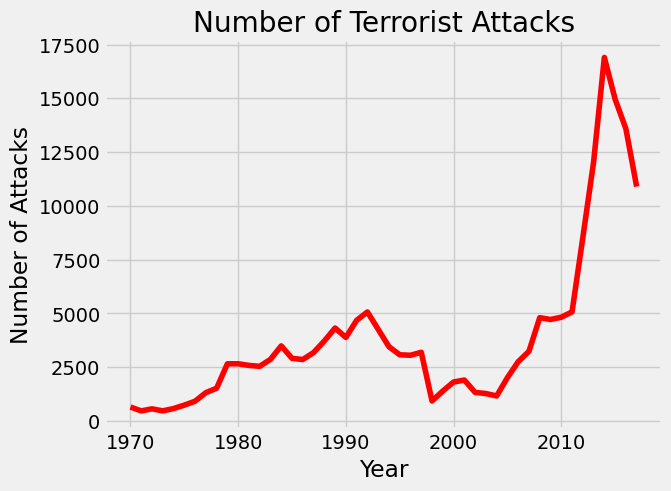

In [17]:
year_attacks = df.groupby('Year').size().reset_index(name='count')
sns.lineplot(x='Year', y='count', data=year_attacks, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Number of Terrorist Attacks")
plt.show()

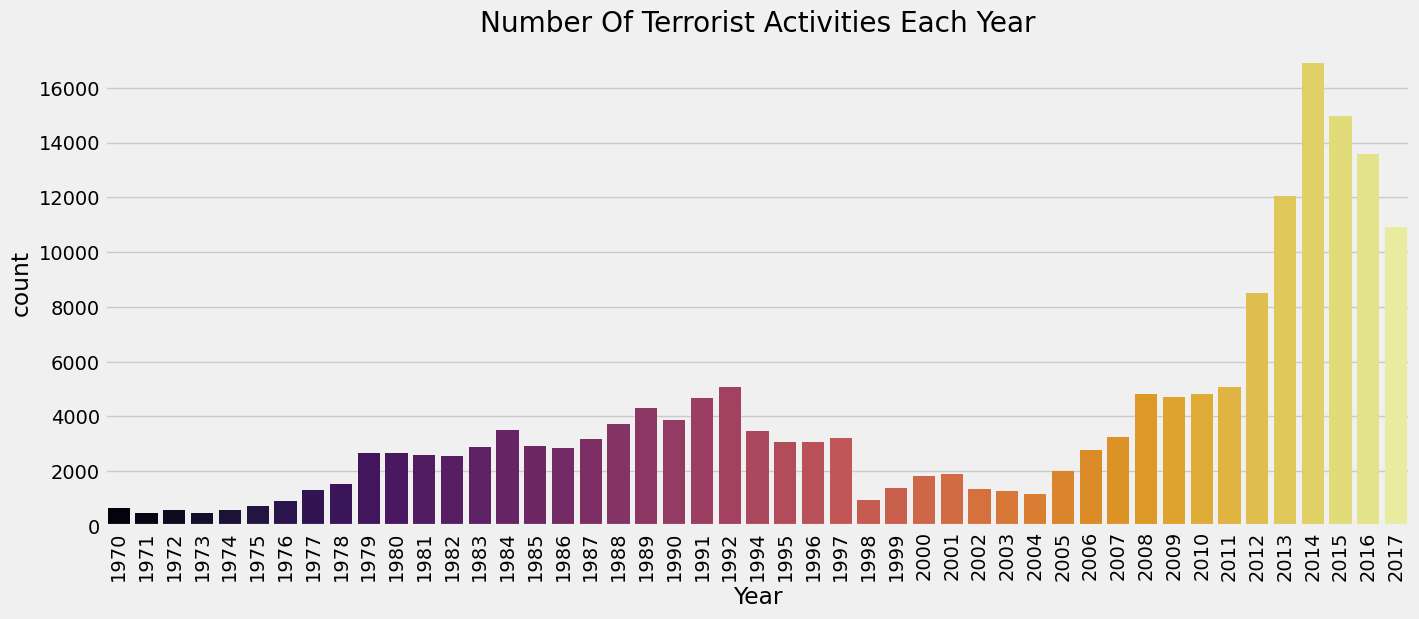

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='Year', palette='inferno')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Terrorist Attacks Trends in Regions

In [19]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

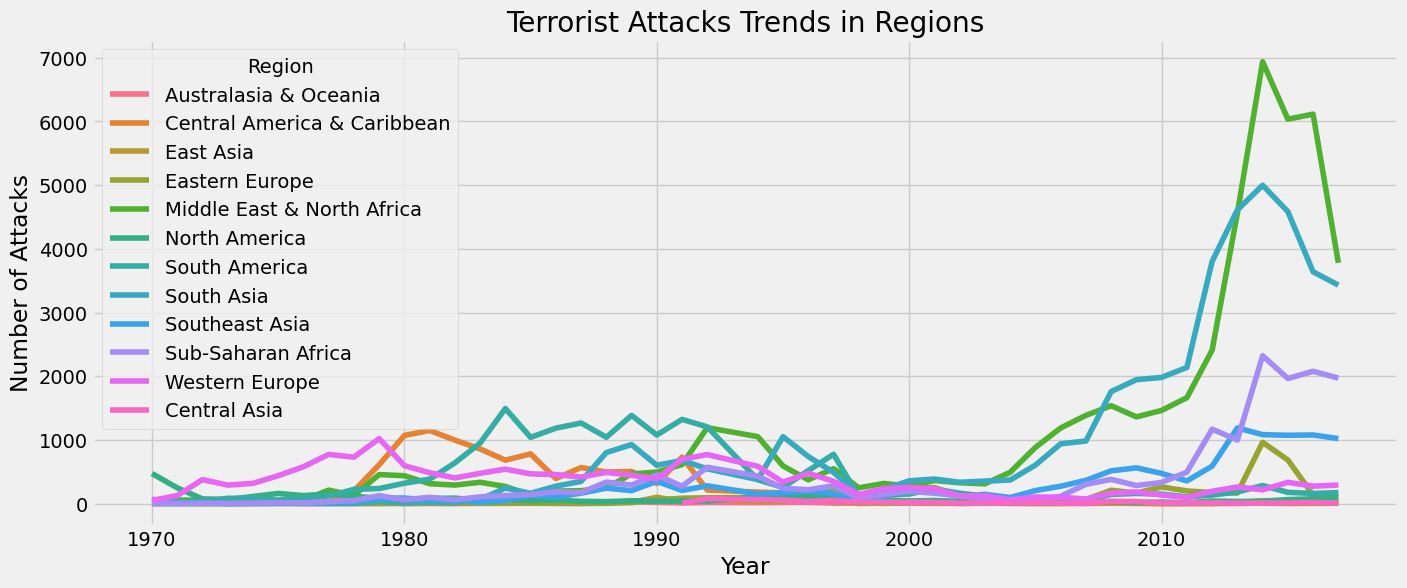

In [20]:
plt.subplots(figsize=(15,6))
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

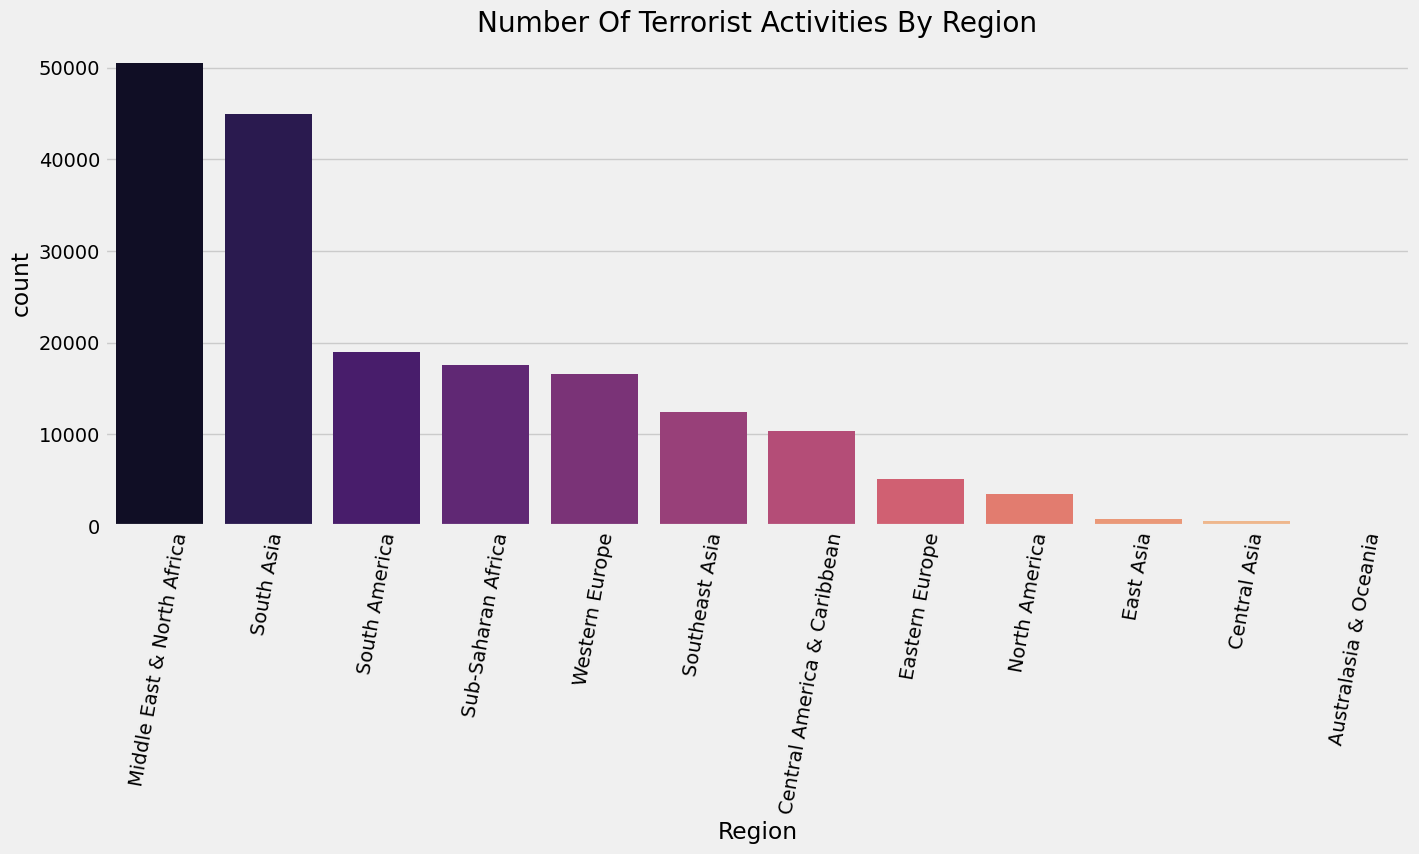

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region',data=df,palette='magma',order=df['Region'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Terrorism in the Middle East has been on the rise annually, primarily due to persistent geopolitical conflicts and the activities of extremist groups. South Asia has also seen an increase in terrorism, frequently connected to criminal networks and drug trafficking. Conversely, Central Asia experiences relatively lower rates of terrorism

Top 10 Affected Countries

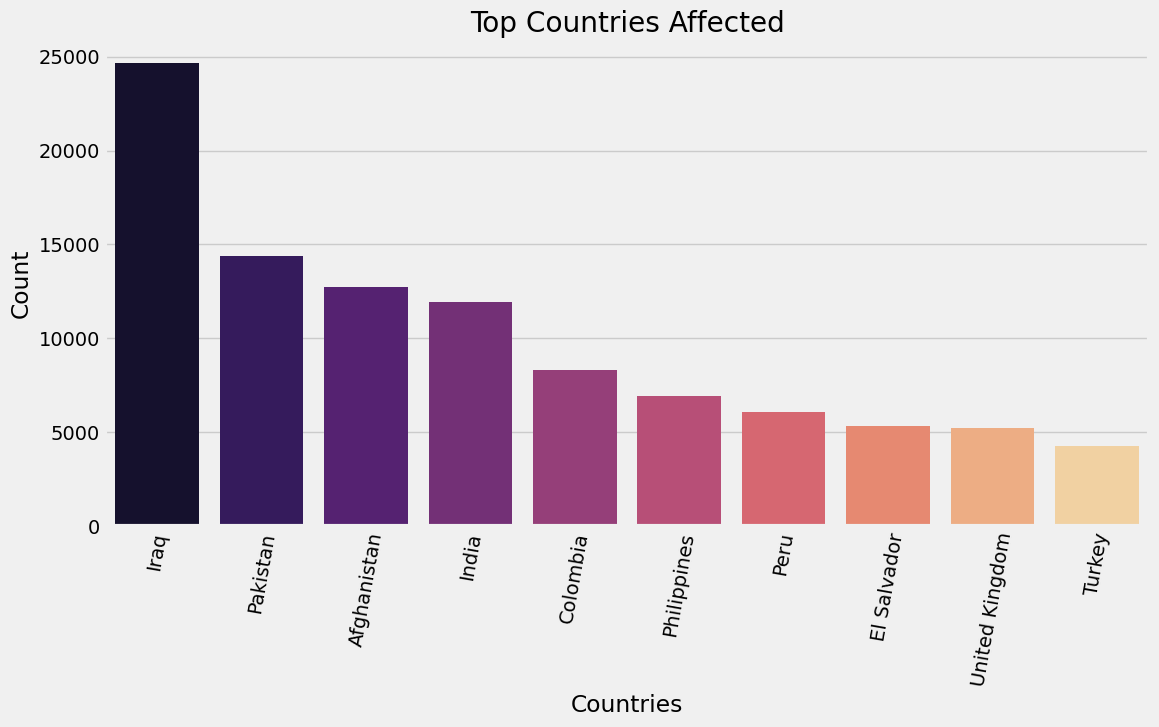

In [22]:
plt.subplots(figsize=(12,6))
top=df['Country'].value_counts()[:10].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

The graph highlights five countries most affected by terrorism:

Iraq
Pakistan
Afghanistan
India
Colombia
These nations face significant challenges related to terrorism, requiring ongoing efforts to ensure the safety and security of their populations and regional stability.

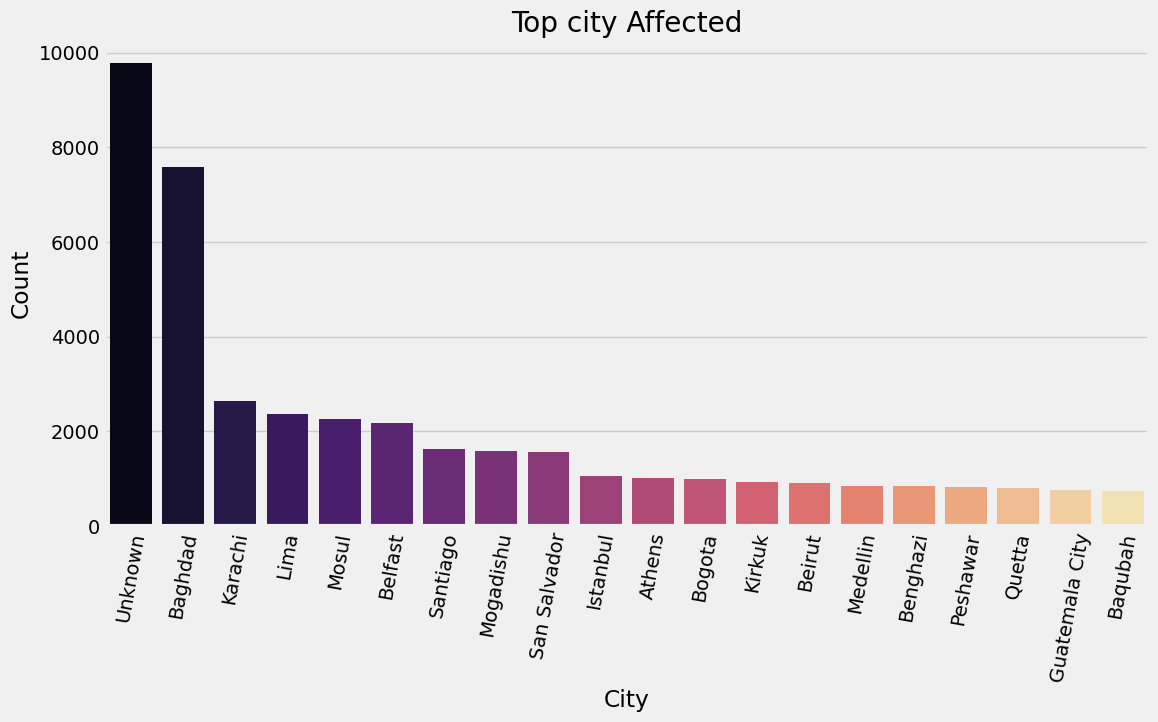

In [23]:
plt.subplots(figsize=(12,6))
top=df['city'].value_counts()[:20].to_frame().reset_index()
top.columns= ['city','Attacks_Counts']
sns.barplot(x='city',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top city Affected')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

Attacking Methods by Terrorists

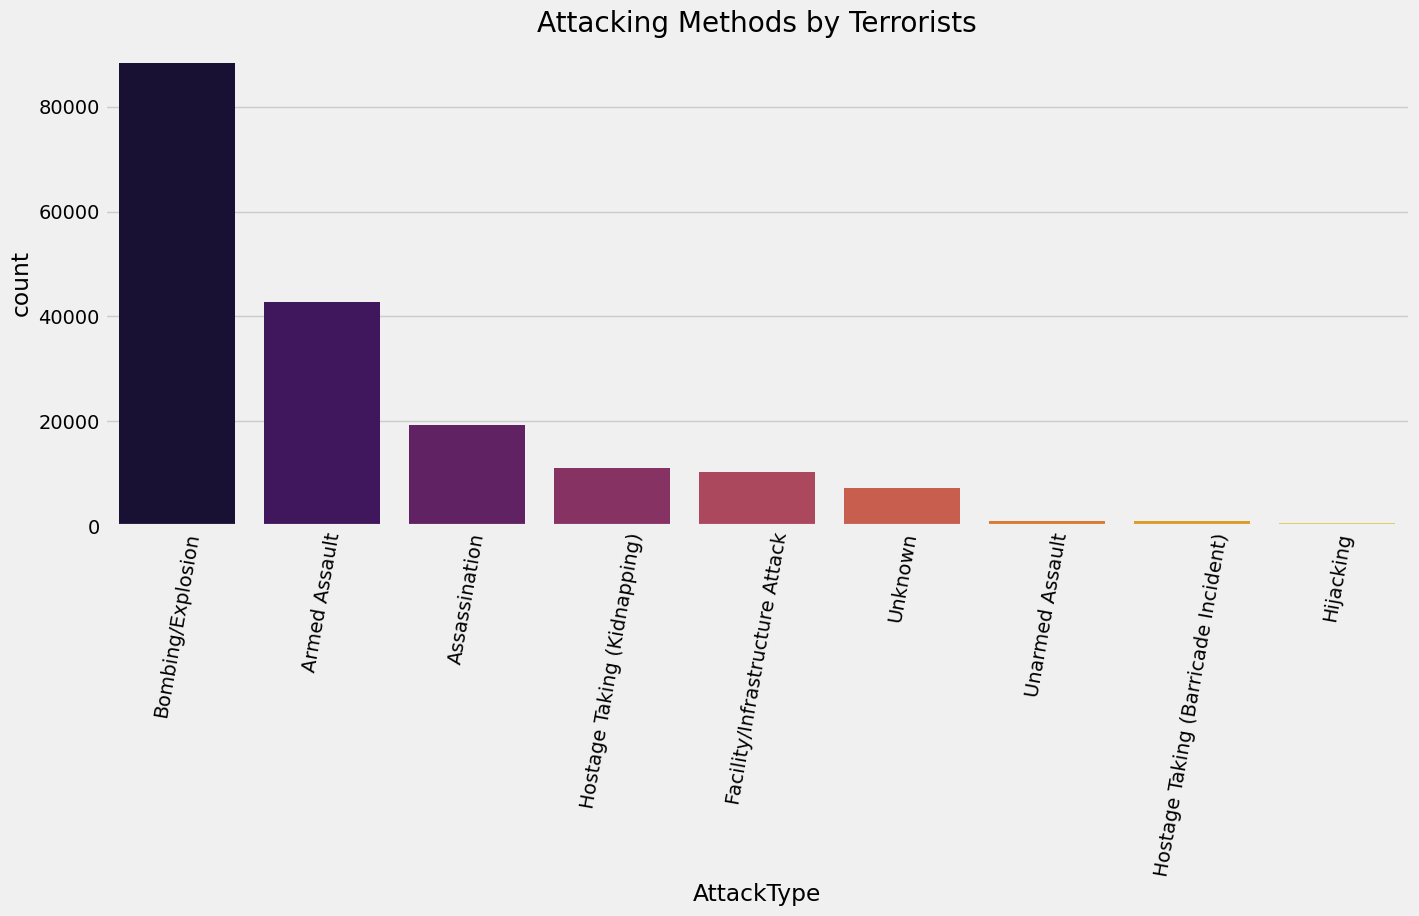

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType',data=df,palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Attacking Methods by Terrorists')
plt.show()

Top Terrorists Group

In [25]:
group_counts = df['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Selecting the top 5 frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(10)

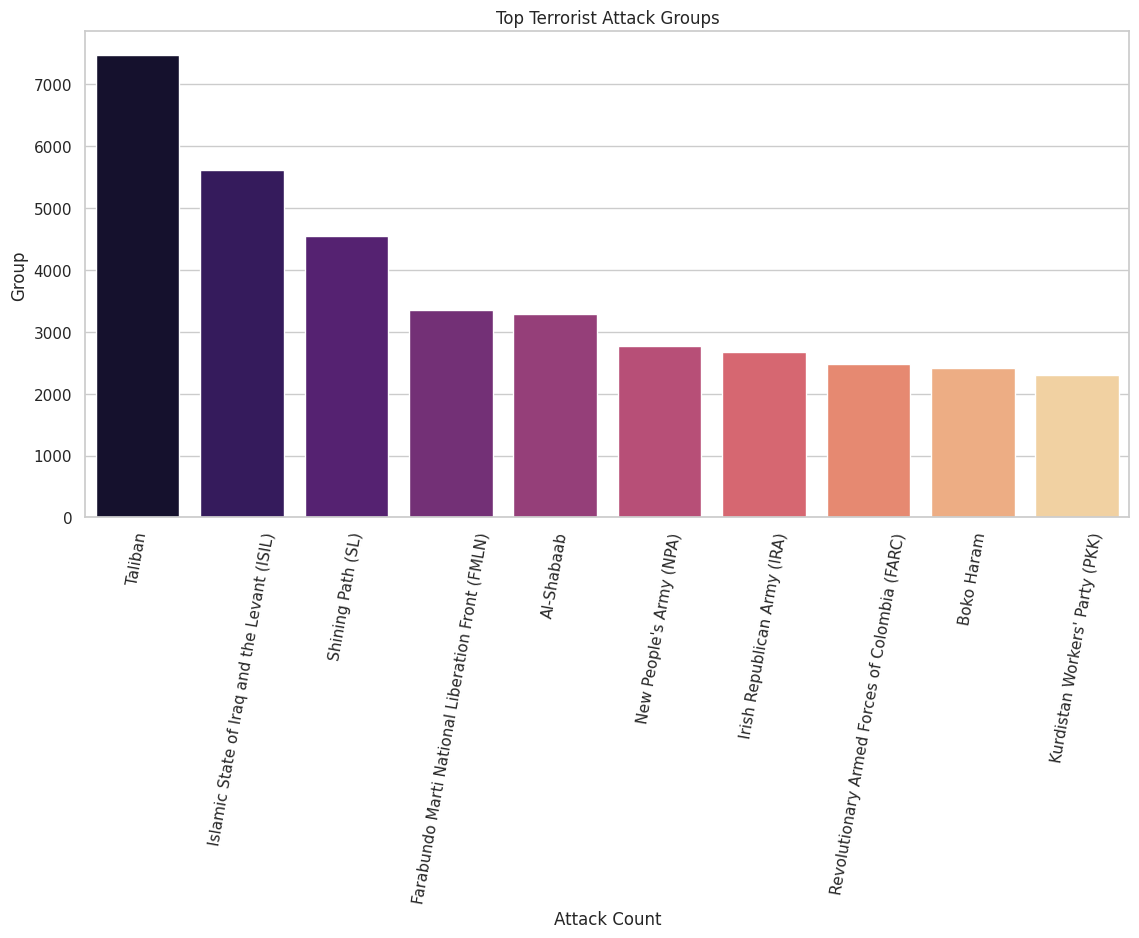

In [26]:
# Plotting top 5 terrorists groups

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="magma")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 80)
plt.show()

The Taliban is a prominent terrorist group, but it's important to note that the global terrorism landscape is complex. Other significant terrorist groups, like ISIS, Al-Qaeda, Boko Haram, and Al-Shabaab, also operate in various regions, making it challenging to definitively label one as the "most active" worldwide. The prominence of these groups can change over time

Activity of Top Terrorist Groups

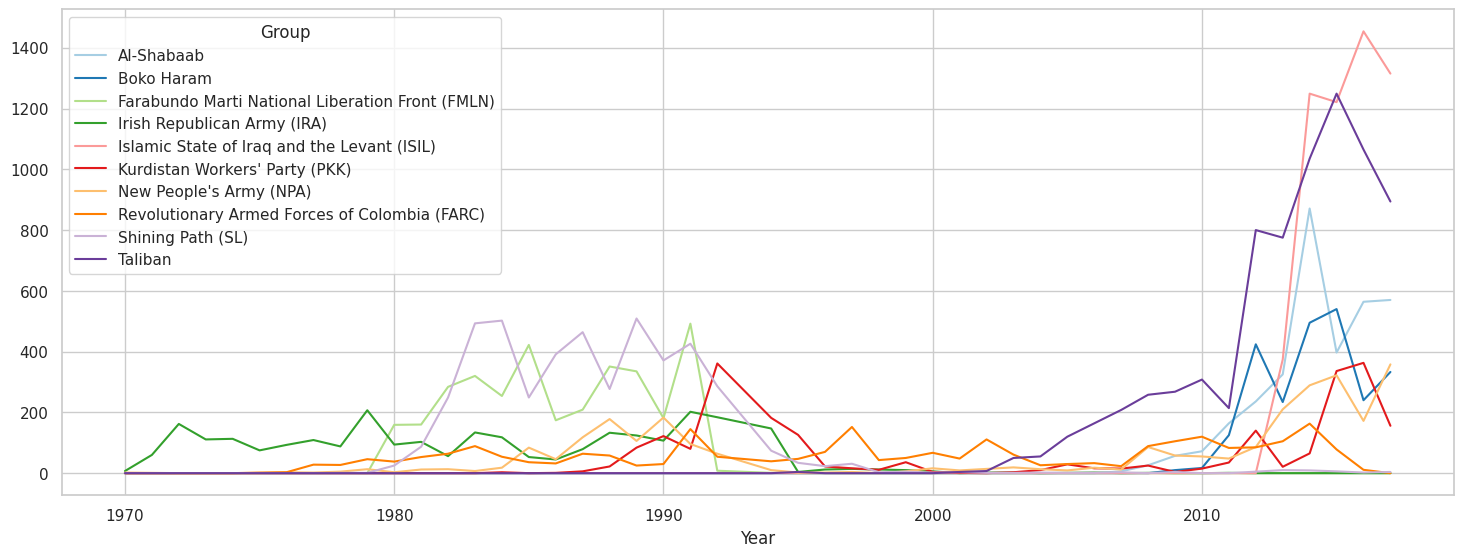

In [27]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

Regions Attacked By Terrorist Groups

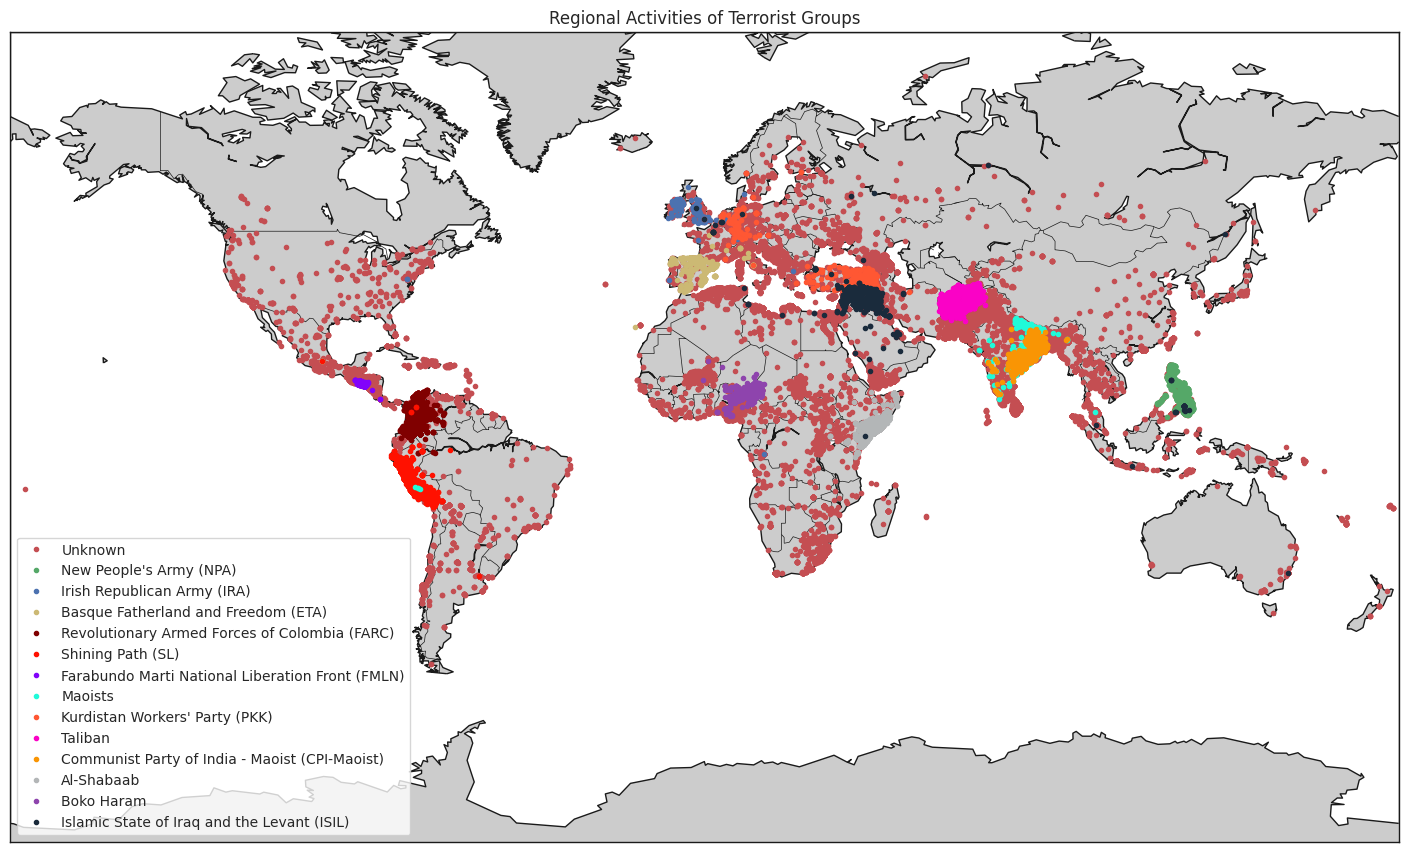

In [28]:
top_groups=df[df['Group'].isin(df['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

People Killed and Wounded In Each Year

In [29]:
k=df[["Year","Killed"]].groupby("Year").sum()

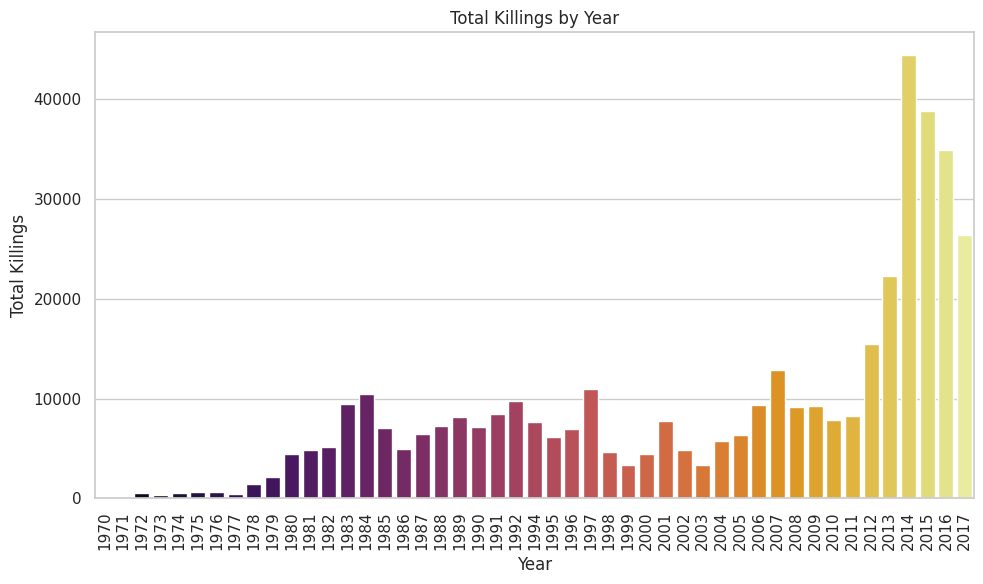

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=k.index, y="Killed", palette="inferno",data=k)

plt.title("Total Killings by Year")
plt.xlabel("Year")
plt.ylabel("Total Killings")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [31]:
k=df[["Year","Wounded"]].groupby("Year").sum()

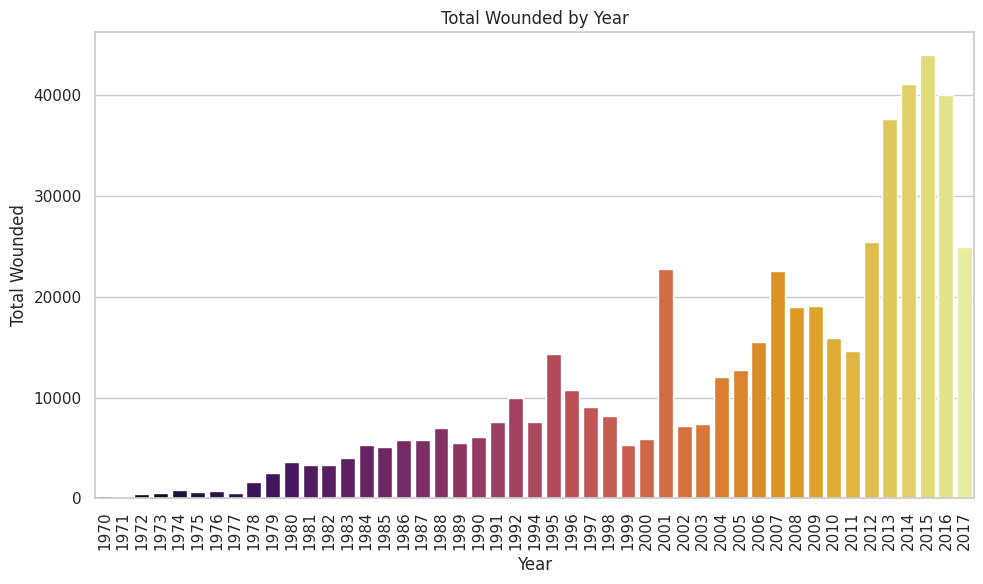

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=k.index, y="Wounded", palette="inferno",data=k)

plt.title("Total Wounded by Year")
plt.xlabel("Year")
plt.ylabel("Total Wounded")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

People Killed and Wounded In Each Region

In [33]:
k=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [34]:
w=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


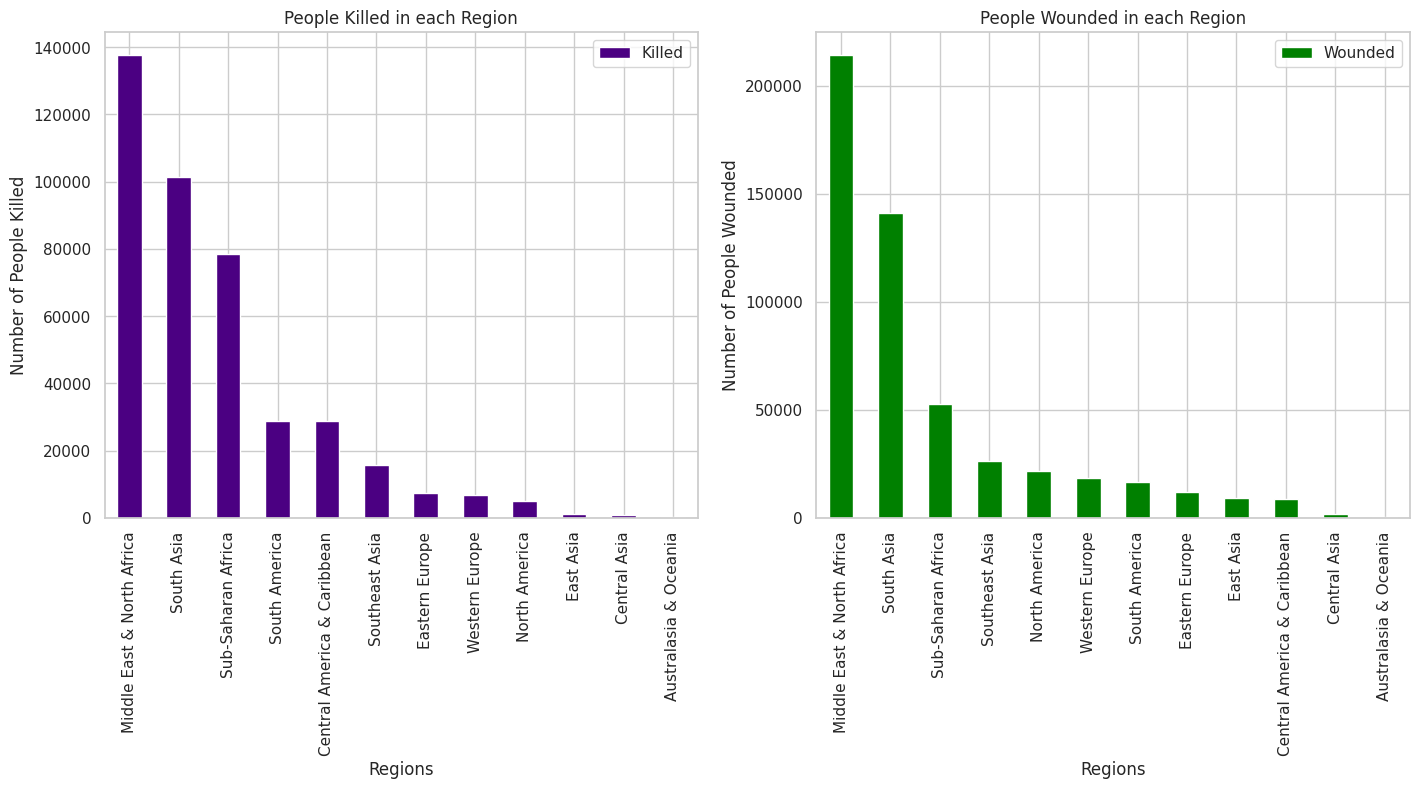

In [35]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w.plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

Types of terrorist attacks that cause deaths

In [37]:
killdata = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killdata.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [38]:
attackData = df.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killdata], axis=1)

In [39]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


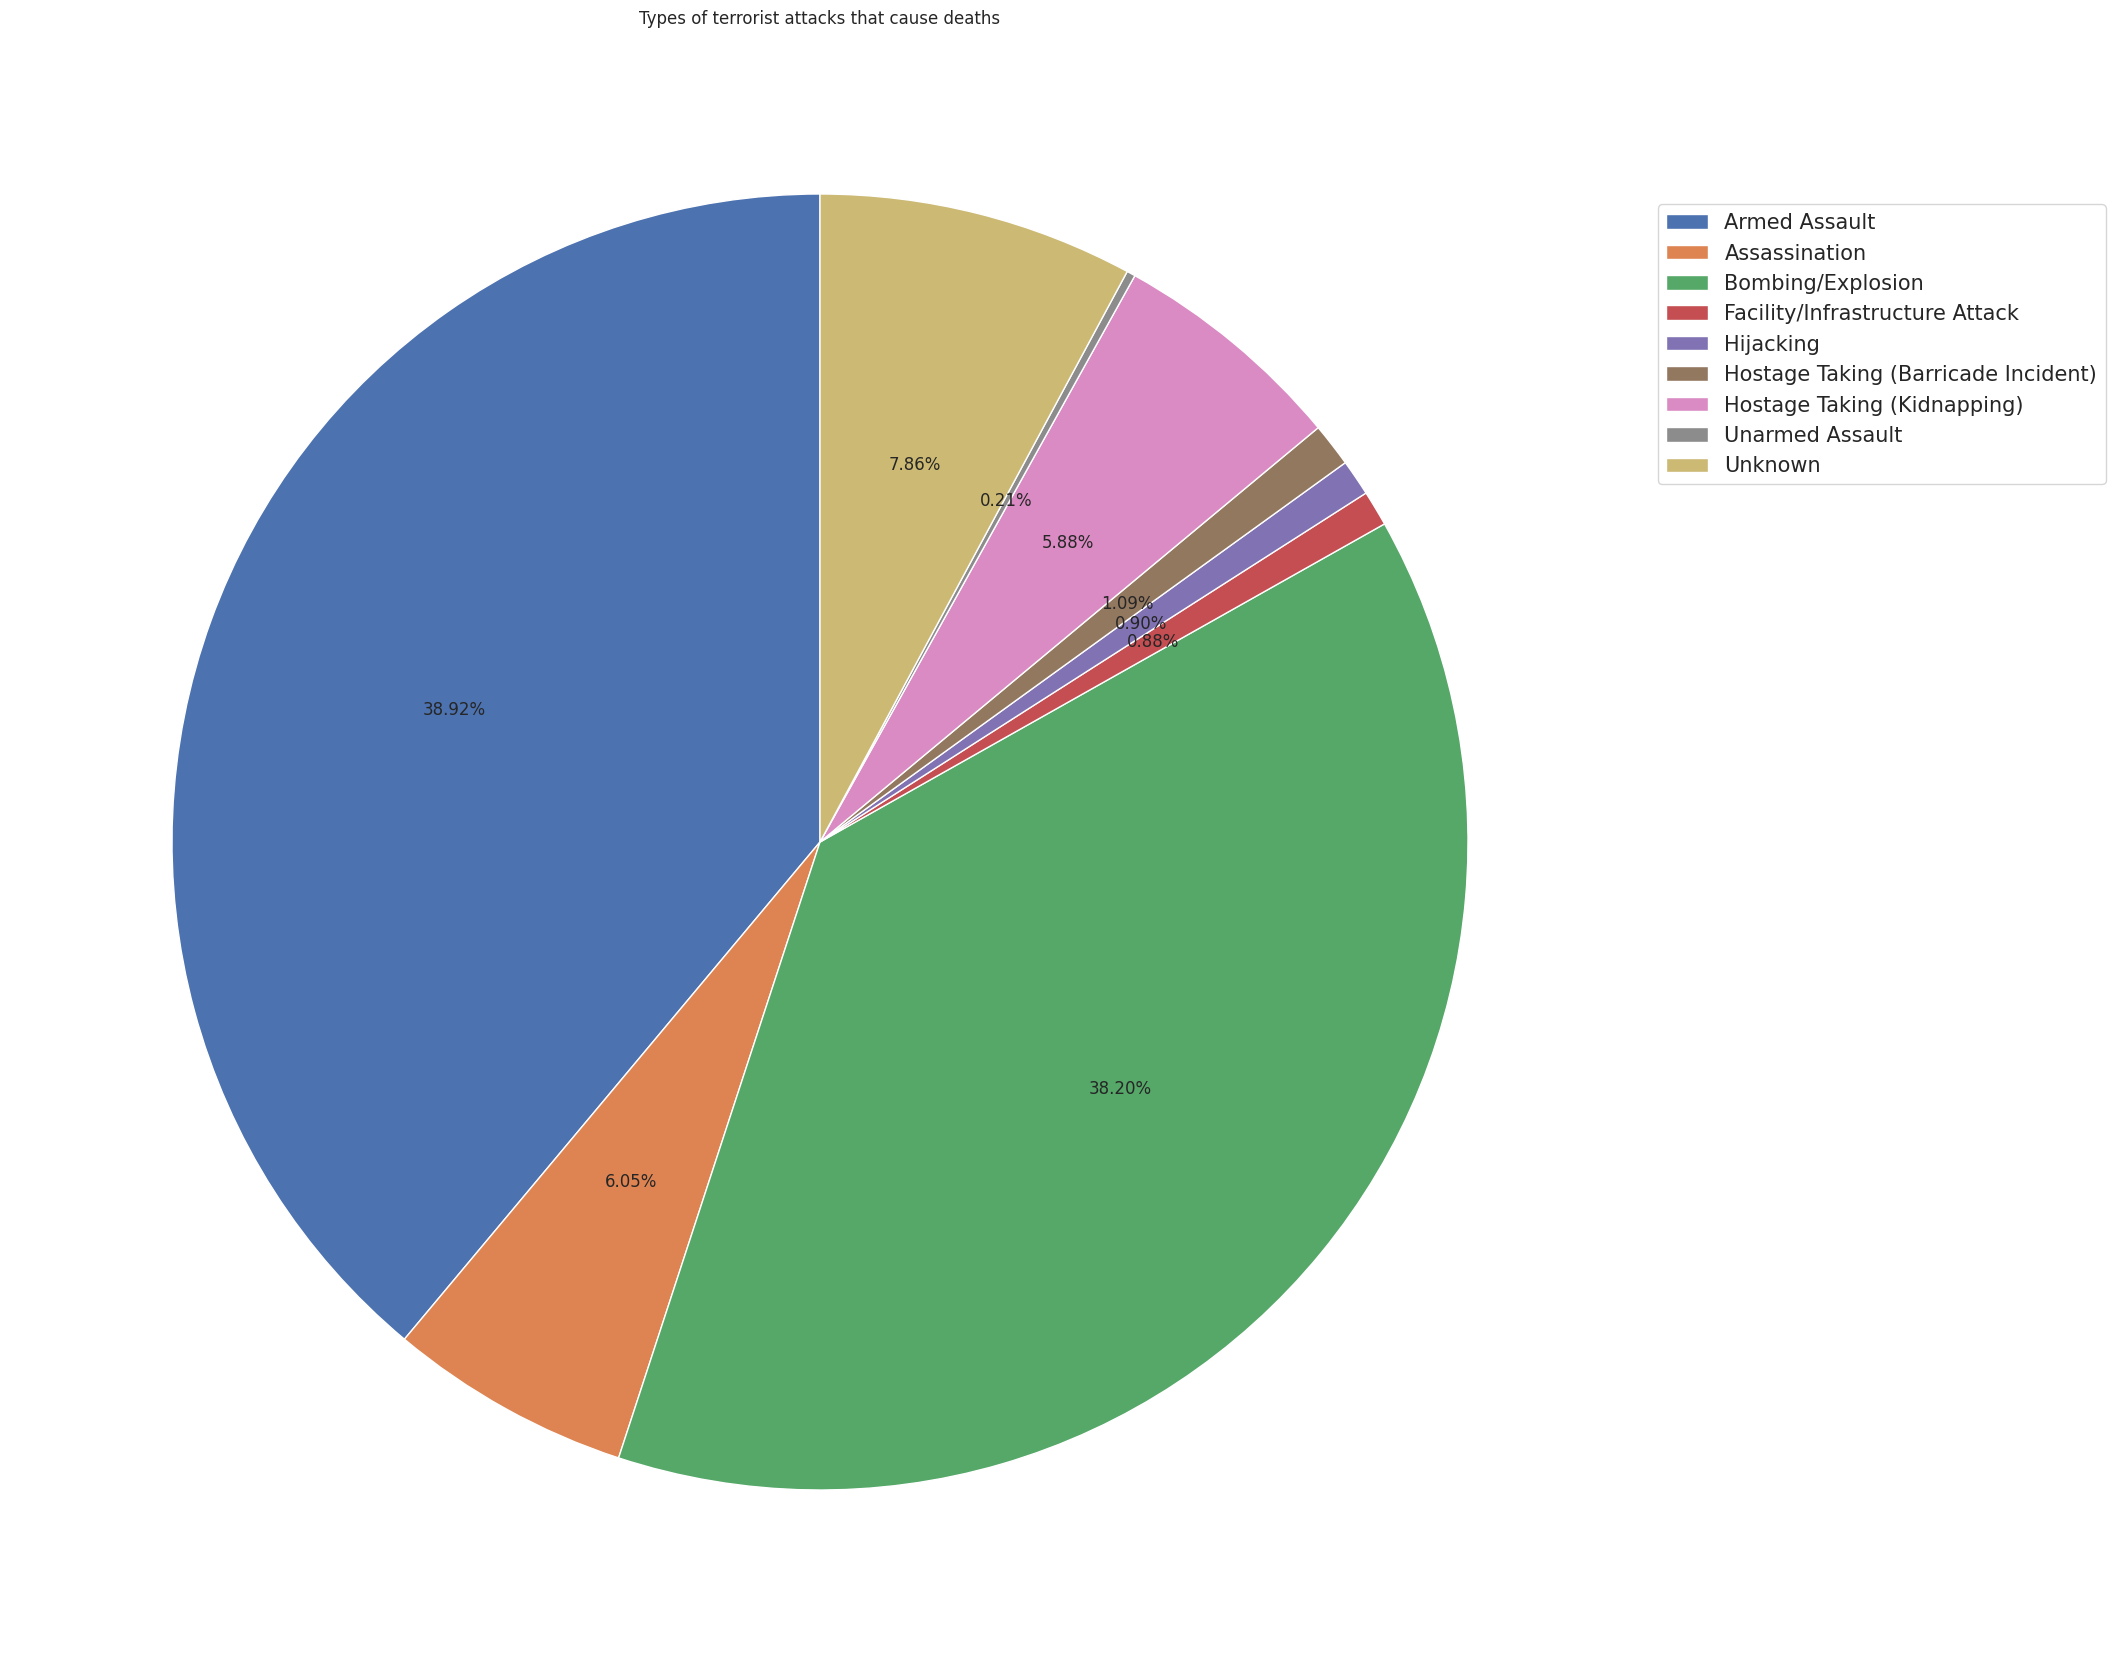

In [40]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()


**The combination of armed assaults and bombings/explosions is responsible for a significant 77% of fatalities in terrorist attacks. This highlights the persistent use of these tactics and underscores the global threat posed by weapons and explosives.**

Terrorist Attacks in India

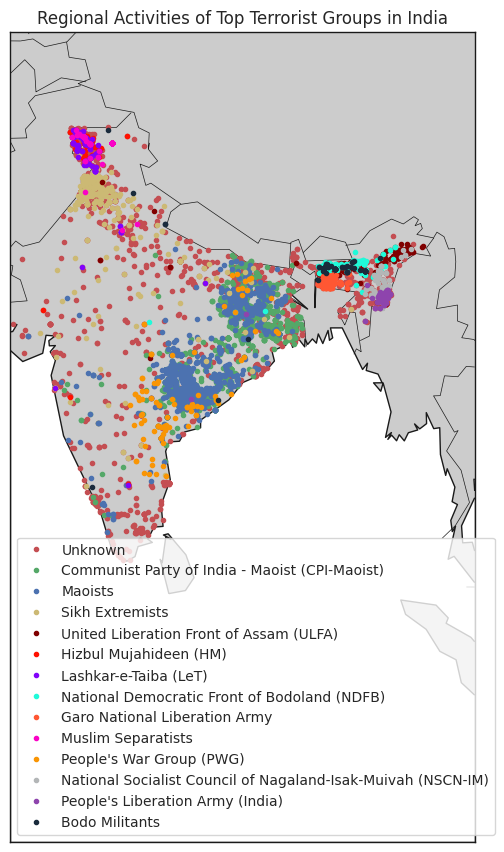

In [41]:
india_data = df[df['Country'] == 'India']

# Get the top 14 terrorist groups in India
top_groups = india_data['Group'].value_counts().head(14).index

# Create a Basemap instance
m4 = Basemap(
    projection='mill',
    llcrnrlat=-10,
    urcrnrlat=40,
    llcrnrlon=70,
    urcrnrlon=100,
    resolution='c',
    lat_0=True,
    lat_1=True
)

# Customize the map
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(22, 10)

# Define colors for plotting
colors = ['r', 'g', 'b', 'y', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6', "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']

# Iterate through the top groups and plot their activities
for group, color in zip(top_groups, colors):
    group_data = india_data[india_data['Group'] == group]
    x_group, y_group = m4(group_data['longitude'].values, group_data['latitude'].values)
    m4.plot(x_group, y_group, 'go', markersize=3, color=color, label=group)

# Add legend
plt.legend(loc='lower left', frameon=True, prop={'size': 10})

# Set the plot title
plt.title('Regional Activities of Top Terrorist Groups in India')

# Show the plot
plt.show()

In [42]:
India = df[(df['Country'] == 'India')]
India.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success,casualities
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,1,0.0
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,...,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,1,4.0
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,1,0.0
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,...,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,1,0.0
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,...,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,1,NaN


In [43]:
India_attacks = India['eventid'].count()
print('There were',India_attacks ,'attacks in India.')

There were 11960 attacks in India.


In [46]:
India_success = India.groupby('success').size().reset_index(name='count')
India_success['percentage'] = India_success['count'] / India_attacks * 100
India_success

,success,count,percentage
0,0,1680,14.046823
1,1,10280,85.953177


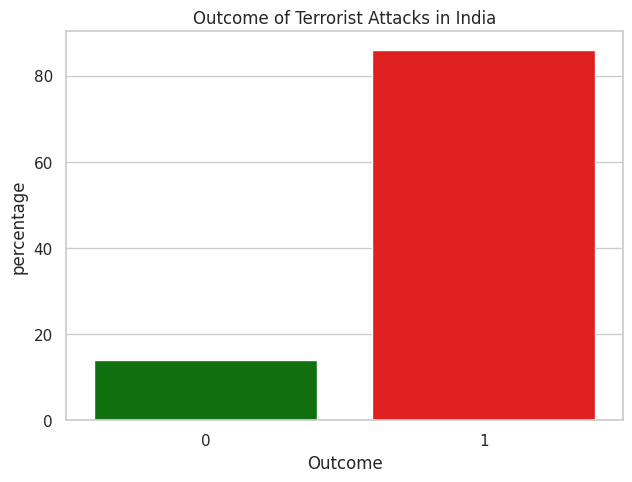

In [48]:
sns.barplot(x='success', y='percentage', data = India_success,palette=['green', 'red'])
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")
plt.show()

Attack types in India and their success rates

In [49]:
attack_types_India = India.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_India

,AttackType,success,count
0,Armed Assault,0,244
1,Armed Assault,1,2940
2,Assassination,0,228
3,Assassination,1,1001
4,Bombing/Explosion,0,1128
5,Bombing/Explosion,1,3697
6,Facility/Infrastructure Attack,0,33
7,Facility/Infrastructure Attack,1,963
8,Hijacking,0,4
9,Hijacking,1,39


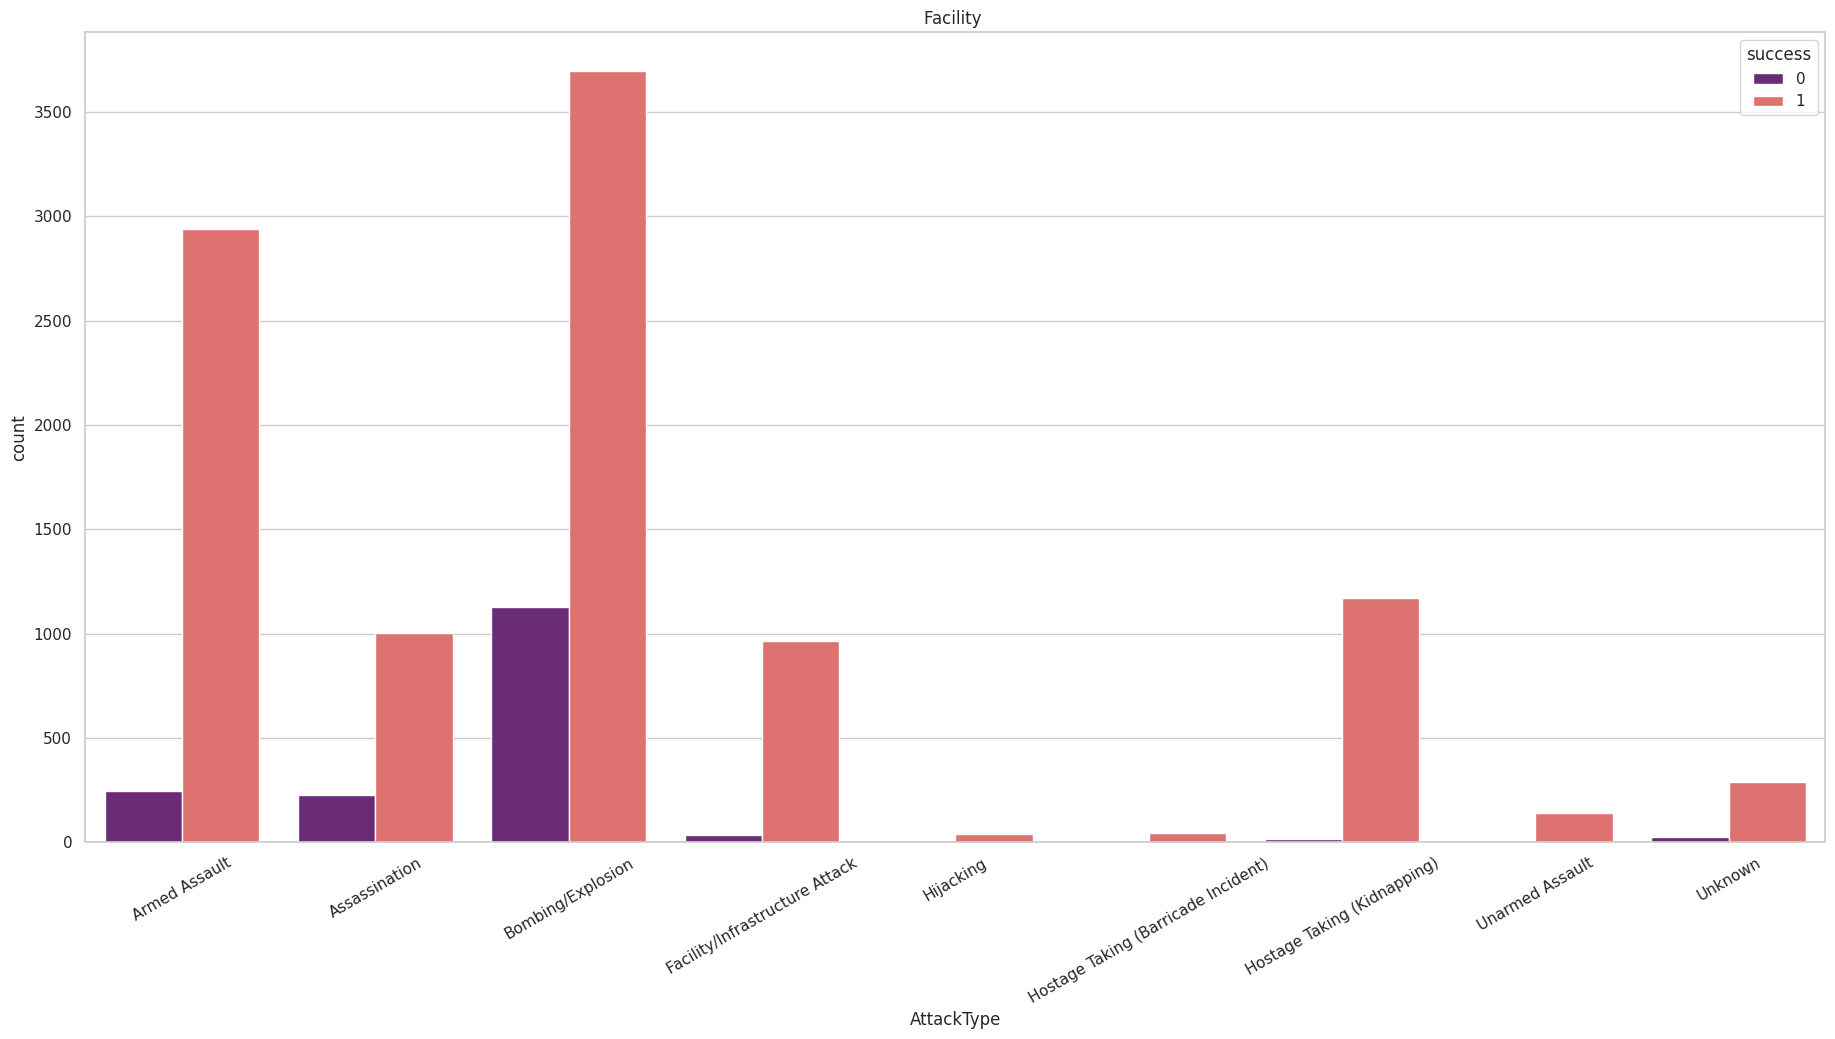

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_India,  palette= 'magma')
plt.xticks(rotation=30)
plt.title("Facility ")
plt.show()

In [52]:
no_of_kills_India = India.groupby('AttackType')[['Killed']].sum().reset_index()
no_of_kills_India

,AttackType,Killed
0,Armed Assault,9378.0
1,Assassination,2001.0
2,Bombing/Explosion,5830.0
3,Facility/Infrastructure Attack,135.0
4,Hijacking,42.0
5,Hostage Taking (Barricade Incident),136.0
6,Hostage Taking (Kidnapping),819.0
7,Unarmed Assault,28.0
8,Unknown,972.0


<Axes: xlabel='AttackType', ylabel='Killed'>

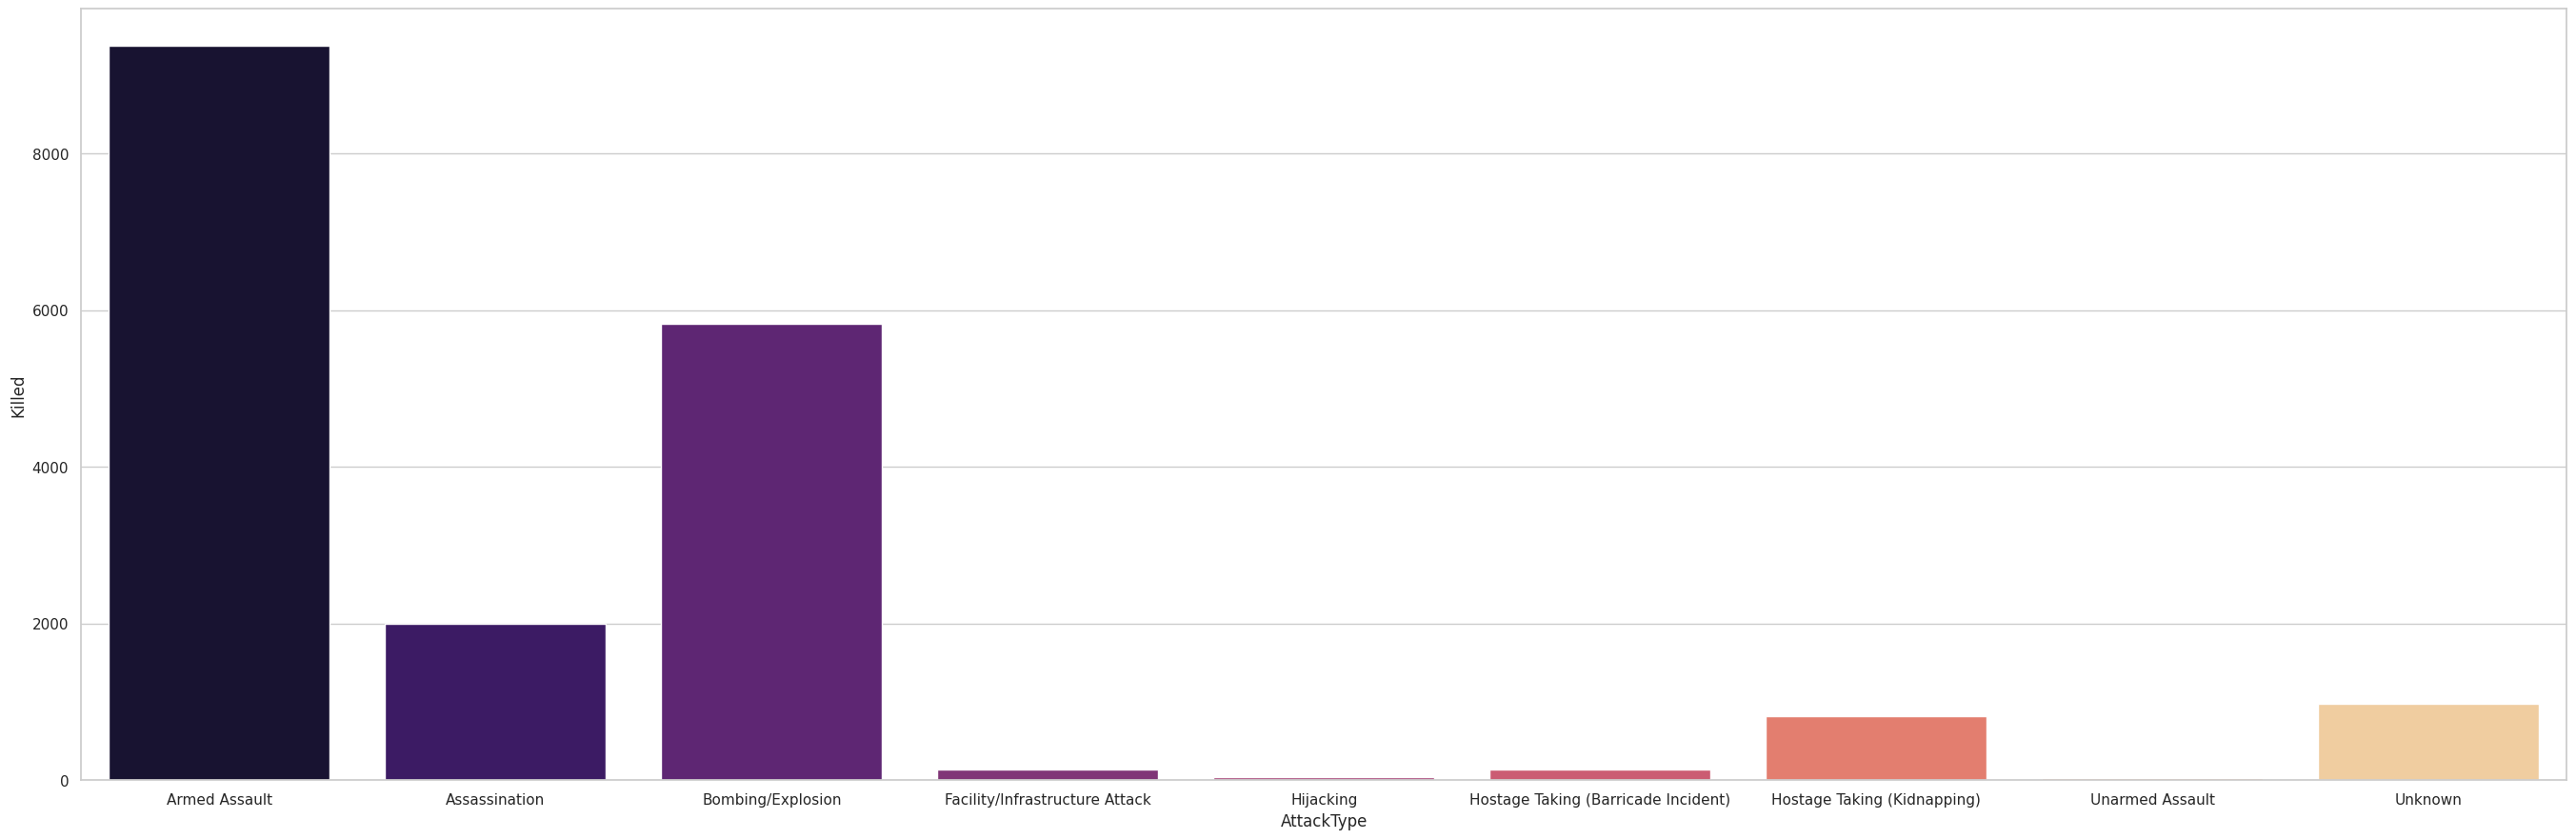

In [53]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=no_of_kills_India,palette= 'magma')

**Conclusion**

In conclusion, the exploratory data analysis of global terrorism data reveals a disturbing trend in the rising incidence of terrorism, particularly in regions like the Middle East, North Africa, and South America. The high success rate of these attacks, with 89% achieving their intended outcomes, underscores the alarming effectiveness and persistence of terrorist groups. The prevalence of bombings and explosions as the primary tactics resulting in the most casualties further emphasizes the devastating impact on human lives and infrastructure. These findings highlight the urgent need for comprehensive counterterrorism strategies, including addressing the root causes, strengthening intelligence and security measures, and fostering international cooperation. Only through a concerted global effort can we hope to mitigate the growing threat of terrorism and work towards a safer, more peaceful world.